In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class layer:
    def __init__(self, in_size, out_size):
#         self.W = tf.Variable(tf.zeros([in_size, out_size]))
        self.W = tf.Variable(tf.random_normal([in_size, out_size], mean=0.0, stddev=0.01))
#         self.b = tf.Variable(tf.zeros([1,out_size]))
#         self.b = tf.Variable(tf.constant(0.1, shape=[1,out_size]))
        self.b = tf.Variable(tf.random_normal([1, out_size], mean=0.0, stddev=0.01))
    
        
    def output(self, inputs, activation_function=None):
        if activation_function == None:
            return tf.matmul(inputs, self.W) + self.b
        else :
            return activation_function(tf.matmul(inputs, self.W) + self.b)

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
batch_size = 256
g_dim = 128

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
x_d = tf.placeholder(tf.float32, shape=[None, 784])
x_g = tf.placeholder(tf.float32, shape=[None, 128])

In [5]:
d_l1 = layer(784, g_dim)
d_l2 = layer(g_dim, 1)

g_l1 = layer(g_dim, 256)
g_l2 = layer(256, 784)

var_d = [d_l1.W, d_l1.b, d_l2.W, d_l2.b]
var_g = [g_l1.W, g_l1.b, g_l2.W, g_l2.b]

In [6]:
def discriminator(x):
    h_d1 = d_l1.output(x, tf.nn.relu)
    h_d2 = d_l2.output(h_d1, tf.nn.sigmoid)
    return h_d2

def generator(x):
    h_g1 = g_l1.output(x, tf.nn.relu)
    h_g2 = g_l2.output(h_g1, tf.nn.sigmoid)
    return h_g2

def sample_Z(m,n):
    return np.random.uniform(-1., 1., size=[m,n])

g_sample = generator(x_g)
d_real = discriminator(x_d)
d_fake = discriminator(g_sample)

d_loss = -tf.reduce_mean(tf.log(d_real)+tf.log(1-d_fake))    # d_real, 1-d_fake bigger -> better
g_loss = -tf.reduce_mean(tf.log(d_fake))    # d_fake bigger -> better


In [7]:
d_optimizer = tf.train.AdamOptimizer(0.00003).minimize(d_loss, var_list = var_d)
g_optimizer = tf.train.AdamOptimizer(0.00003).minimize(g_loss, var_list = var_g)

step: 0  d-loss: 1.38706  g-loss: 0.686956
step: 1000  d-loss: 0.499048  g-loss: 3.28122
step: 2000  d-loss: 0.926021  g-loss: 1.40867
step: 3000  d-loss: 0.963042  g-loss: 1.24963
step: 4000  d-loss: 0.953107  g-loss: 1.11
step: 5000  d-loss: 1.07282  g-loss: 0.846928
step: 6000  d-loss: 1.14748  g-loss: 0.648265
step: 7000  d-loss: 1.11741  g-loss: 0.616652
step: 8000  d-loss: 1.14161  g-loss: 0.599668
step: 9000  d-loss: 1.14431  g-loss: 0.656855
step: 10000  d-loss: 0.978114  g-loss: 0.824239
step: 11000  d-loss: 0.736353  g-loss: 1.10349
step: 12000  d-loss: 0.664029  g-loss: 1.15436
step: 13000  d-loss: 0.623811  g-loss: 1.36515
step: 14000  d-loss: 0.42629  g-loss: 1.73519
step: 15000  d-loss: 0.427223  g-loss: 1.66115
step: 16000  d-loss: 0.561675  g-loss: 1.55981
step: 17000  d-loss: 0.514397  g-loss: 1.763
step: 18000  d-loss: 0.430301  g-loss: 1.92609
step: 19000  d-loss: 0.426965  g-loss: 1.88623
step: 20000  d-loss: 0.585745  g-loss: 1.81792


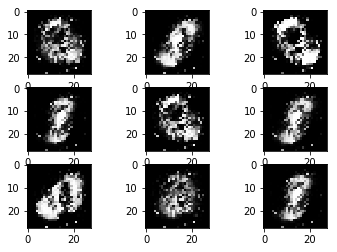

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(20001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train

zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')


step: 0  d-loss: 0.591032  g-loss: 1.76017
step: 1000  d-loss: 0.567538  g-loss: 1.71925
step: 2000  d-loss: 0.388861  g-loss: 2.02025
step: 3000  d-loss: 0.398003  g-loss: 1.93105
step: 4000  d-loss: 0.48628  g-loss: 1.78494
step: 5000  d-loss: 0.404761  g-loss: 1.87242
step: 6000  d-loss: 0.345002  g-loss: 2.02591
step: 7000  d-loss: 0.517301  g-loss: 1.78505
step: 8000  d-loss: 0.450627  g-loss: 1.87965
step: 9000  d-loss: 0.505994  g-loss: 1.86649
step: 10000  d-loss: 0.508249  g-loss: 1.75388
step: 11000  d-loss: 0.645029  g-loss: 1.50351
step: 12000  d-loss: 0.643721  g-loss: 1.69064
step: 13000  d-loss: 0.642573  g-loss: 1.5706
step: 14000  d-loss: 0.775491  g-loss: 1.40744
step: 15000  d-loss: 0.596555  g-loss: 1.47903
step: 16000  d-loss: 0.657764  g-loss: 1.53164
step: 17000  d-loss: 0.591101  g-loss: 1.67004
step: 18000  d-loss: 0.701655  g-loss: 1.51419
step: 19000  d-loss: 0.638257  g-loss: 1.57088
step: 20000  d-loss: 0.719887  g-loss: 1.54644
step: 21000  d-loss: 0.57671

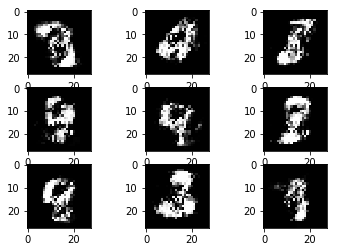

In [9]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        if d_loss_train<1. and g_loss_train<1. :
            break

zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.487923  g-loss: 2.19867
step: 1000  d-loss: 0.432804  g-loss: 2.31464
step: 2000  d-loss: 0.401153  g-loss: 2.39171
step: 3000  d-loss: 0.495196  g-loss: 2.08312
step: 4000  d-loss: 0.48407  g-loss: 2.17393
step: 5000  d-loss: 0.440157  g-loss: 2.16535
step: 6000  d-loss: 0.503728  g-loss: 2.03889
step: 7000  d-loss: 0.477534  g-loss: 1.91791
step: 8000  d-loss: 0.530573  g-loss: 2.15881
step: 9000  d-loss: 0.525729  g-loss: 1.99171
step: 10000  d-loss: 0.512601  g-loss: 2.07666
step: 11000  d-loss: 0.494928  g-loss: 2.05635
step: 12000  d-loss: 0.552804  g-loss: 2.11325
step: 13000  d-loss: 0.489184  g-loss: 2.19948
step: 14000  d-loss: 0.478824  g-loss: 2.13128
step: 15000  d-loss: 0.482617  g-loss: 2.07611
step: 16000  d-loss: 0.424905  g-loss: 2.26584
step: 17000  d-loss: 0.502916  g-loss: 1.97194
step: 18000  d-loss: 0.503704  g-loss: 2.17294
step: 19000  d-loss: 0.504482  g-loss: 2.17639
step: 20000  d-loss: 0.541351  g-loss: 2.1013
step: 21000  d-loss: 0.59885

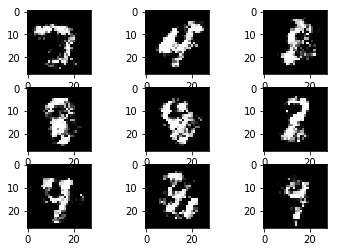

In [10]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        if d_loss_train<1. and g_loss_train<1. :
            break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.47948  g-loss: 2.25667
step: 1000  d-loss: 0.561303  g-loss: 2.14702
step: 2000  d-loss: 0.528137  g-loss: 2.18883
step: 3000  d-loss: 0.526509  g-loss: 2.21811
step: 4000  d-loss: 0.502739  g-loss: 2.14922
step: 5000  d-loss: 0.491998  g-loss: 2.16113
step: 6000  d-loss: 0.533166  g-loss: 2.06918
step: 7000  d-loss: 0.488249  g-loss: 2.17679
step: 8000  d-loss: 0.524865  g-loss: 2.13909
step: 9000  d-loss: 0.521662  g-loss: 2.26729
step: 10000  d-loss: 0.468734  g-loss: 2.23132
step: 11000  d-loss: 0.498588  g-loss: 2.08043
step: 12000  d-loss: 0.564567  g-loss: 1.94544
step: 13000  d-loss: 0.487021  g-loss: 2.22683
step: 14000  d-loss: 0.443012  g-loss: 2.23101
step: 15000  d-loss: 0.500875  g-loss: 2.19173
step: 16000  d-loss: 0.54307  g-loss: 2.20205
step: 17000  d-loss: 0.511107  g-loss: 2.22242
step: 18000  d-loss: 0.438416  g-loss: 2.23823
step: 19000  d-loss: 0.519709  g-loss: 2.17458
step: 20000  d-loss: 0.450751  g-loss: 2.2966
step: 21000  d-loss: 0.470232

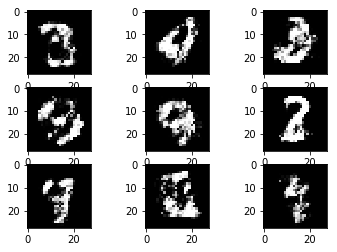

In [11]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        if d_loss_train<1.5 and g_loss_train<1.5 :
            break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.610981  g-loss: 1.98735
step: 1000  d-loss: 0.716566  g-loss: 1.99934
step: 2000  d-loss: 0.67025  g-loss: 2.04485
step: 3000  d-loss: 0.650563  g-loss: 2.01327
step: 4000  d-loss: 0.689791  g-loss: 2.09834
step: 5000  d-loss: 0.712804  g-loss: 2.0115
step: 6000  d-loss: 0.782616  g-loss: 1.84454
step: 7000  d-loss: 0.696146  g-loss: 2.01673
step: 8000  d-loss: 0.706617  g-loss: 1.85793
step: 9000  d-loss: 0.661126  g-loss: 1.92573
step: 10000  d-loss: 0.60751  g-loss: 1.91718
step: 11000  d-loss: 0.741884  g-loss: 2.06415
step: 12000  d-loss: 0.617494  g-loss: 1.88972
step: 13000  d-loss: 0.688427  g-loss: 1.96868
step: 14000  d-loss: 0.698849  g-loss: 1.97467
step: 15000  d-loss: 0.73803  g-loss: 1.93659
step: 16000  d-loss: 0.639765  g-loss: 2.01784
step: 17000  d-loss: 0.71495  g-loss: 1.87087
step: 18000  d-loss: 0.64945  g-loss: 1.88681
step: 19000  d-loss: 0.765662  g-loss: 1.85346
step: 20000  d-loss: 0.660615  g-loss: 1.8993
step: 21000  d-loss: 0.633994  g-

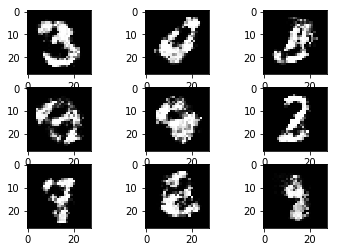

In [12]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        if d_loss_train<1.5 and g_loss_train<1.5 :
            break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.765029  g-loss: 1.84278
step: 1000  d-loss: 0.8079  g-loss: 1.72593
step: 2000  d-loss: 0.761835  g-loss: 1.79909
step: 3000  d-loss: 0.791727  g-loss: 1.75937
step: 4000  d-loss: 0.716814  g-loss: 1.73821
step: 5000  d-loss: 0.740628  g-loss: 1.74864
step: 6000  d-loss: 0.697716  g-loss: 1.81185
step: 7000  d-loss: 0.823777  g-loss: 1.67805
step: 8000  d-loss: 0.774224  g-loss: 1.78441
step: 9000  d-loss: 0.756759  g-loss: 1.70193
step: 10000  d-loss: 0.805215  g-loss: 1.6663
step: 11000  d-loss: 0.774505  g-loss: 1.79528
step: 12000  d-loss: 0.79541  g-loss: 1.82169
step: 13000  d-loss: 0.837271  g-loss: 1.75126
step: 14000  d-loss: 0.834123  g-loss: 1.58859
step: 15000  d-loss: 0.791663  g-loss: 1.73958
step: 16000  d-loss: 0.70063  g-loss: 1.80213
step: 17000  d-loss: 0.834748  g-loss: 1.76688
step: 18000  d-loss: 0.830291  g-loss: 1.63863
step: 19000  d-loss: 0.92674  g-loss: 1.63528
step: 20000  d-loss: 0.906497  g-loss: 1.57716
step: 21000  d-loss: 0.767941  g

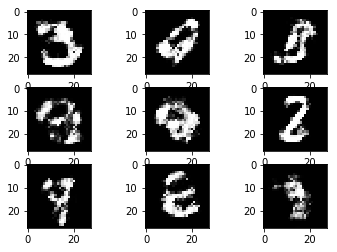

In [13]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train


# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.861769  g-loss: 1.59453
step: 1000  d-loss: 0.859821  g-loss: 1.60842
step: 2000  d-loss: 0.93582  g-loss: 1.59347
step: 3000  d-loss: 0.894057  g-loss: 1.52022
step: 4000  d-loss: 0.928648  g-loss: 1.52245
step: 5000  d-loss: 0.8761  g-loss: 1.55235
step: 6000  d-loss: 0.904895  g-loss: 1.51406
step: 7000  d-loss: 0.873272  g-loss: 1.51579
step: 8000  d-loss: 0.855294  g-loss: 1.65746
step: 9000  d-loss: 0.798558  g-loss: 1.58241
step: 10000  d-loss: 0.88392  g-loss: 1.49189
step: 11000  d-loss: 0.899697  g-loss: 1.59286
step: 12000  d-loss: 0.816091  g-loss: 1.63293
step: 13000  d-loss: 0.948738  g-loss: 1.56292
step: 14000  d-loss: 0.925861  g-loss: 1.62722
step: 15000  d-loss: 0.763963  g-loss: 1.64244
step: 16000  d-loss: 0.887459  g-loss: 1.5572
step: 17000  d-loss: 0.831856  g-loss: 1.63131
step: 18000  d-loss: 0.827535  g-loss: 1.61142
step: 19000  d-loss: 0.974563  g-loss: 1.52567
step: 20000  d-loss: 0.876303  g-loss: 1.5937
step: 21000  d-loss: 0.871297  g

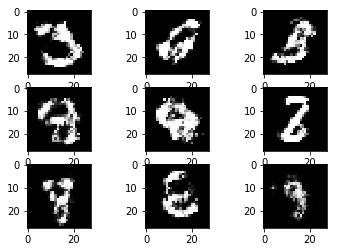

In [14]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train


# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

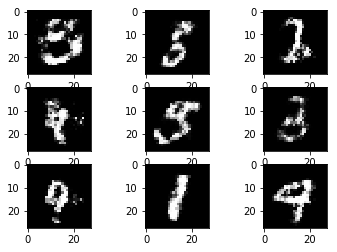

In [16]:
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[25+i*3+j], cmap='gray')

step: 0  d-loss: 0.90264  g-loss: 1.61642
step: 1000  d-loss: 0.879313  g-loss: 1.52223
step: 2000  d-loss: 0.925117  g-loss: 1.59999
step: 3000  d-loss: 0.879017  g-loss: 1.63825
step: 4000  d-loss: 0.887741  g-loss: 1.58074
step: 5000  d-loss: 0.826915  g-loss: 1.63748
step: 6000  d-loss: 0.862402  g-loss: 1.54591
step: 7000  d-loss: 0.888789  g-loss: 1.53726
step: 8000  d-loss: 0.892941  g-loss: 1.60493
step: 9000  d-loss: 0.892393  g-loss: 1.51859
step: 10000  d-loss: 0.840484  g-loss: 1.59059
step: 11000  d-loss: 0.799324  g-loss: 1.6446
step: 12000  d-loss: 0.871095  g-loss: 1.55383
step: 13000  d-loss: 0.842404  g-loss: 1.59648
step: 14000  d-loss: 0.836749  g-loss: 1.53701
step: 15000  d-loss: 0.790793  g-loss: 1.59156
step: 16000  d-loss: 0.805441  g-loss: 1.62433
step: 17000  d-loss: 0.777489  g-loss: 1.65261
step: 18000  d-loss: 0.88239  g-loss: 1.56021
step: 19000  d-loss: 0.798079  g-loss: 1.5295
step: 20000  d-loss: 0.837595  g-loss: 1.5521
step: 21000  d-loss: 0.783602  

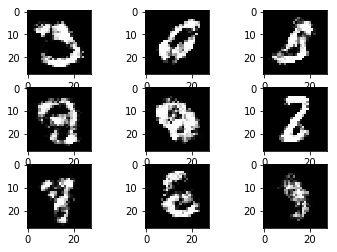

In [17]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train


# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')